**Installation**

In [1]:
pip install -U pip setuptools wheel

In [2]:
pip install -U spacy

In [3]:
!python -m spacy download en_core_web_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [11]:
pip install nltk

**Import**

In [75]:
import numpy as np
import pandas as pd
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
import nltk
nltk.download('punkt')
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from heapq import nlargest

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Read**

In [26]:
# data = pd.read_csv("/content/ww2.txt")
# data = data.to_string()


text = """Samsung recently cancelled its in-person MWC 2021 event, instead, committing to an online-only format. The South Korean tech giant recently made it official, setting a time and date for the Samsung Galaxy MWC Virtual Event.
The event will be held on June 28 at 17:15 UTC (22:45 IST) and will be live-streamed on YouTube. In its release, Samsung says that it will introduce its "ever-expanding Galaxy device ecosystem". Samsung also plans to present the latest technologies and innovation efforts in relation to the growing importance of smart device security.
Samsung will also showcase its vision for the future of smartwatches to provide new experiences for users and new opportunities for developers. Samsung also shared an image for the event with silhouettes of a smartwatch, a smartphone, a tablet and a laptop."""

**Word Cloud**

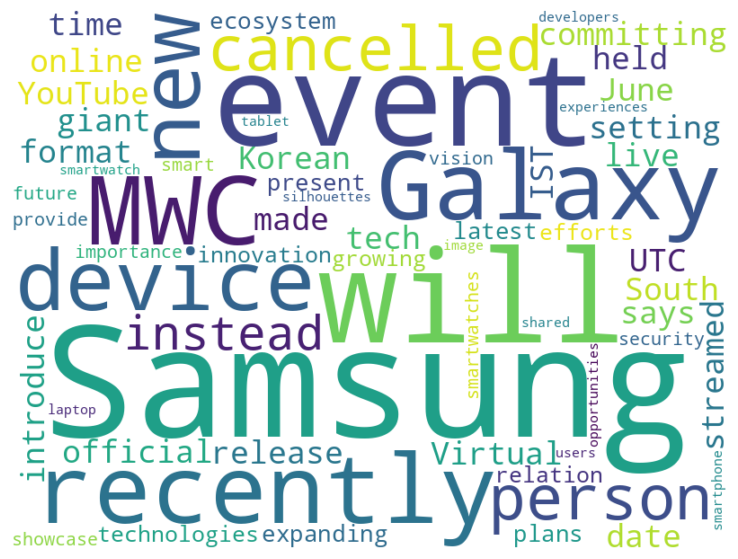

In [46]:
wordcloud = WordCloud(width=800, height=600, background_color="white").generate(text)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [27]:
stopwords = list(STOP_WORDS)
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)
print(doc)

Samsung recently cancelled its in-person MWC 2021 event, instead, committing to an online-only format. The South Korean tech giant recently made it official, setting a time and date for the Samsung Galaxy MWC Virtual Event.
The event will be held on June 28 at 17:15 UTC (22:45 IST) and will be live-streamed on YouTube. In its release, Samsung says that it will introduce its "ever-expanding Galaxy device ecosystem". Samsung also plans to present the latest technologies and innovation efforts in relation to the growing importance of smart device security.
Samsung will also showcase its vision for the future of smartwatches to provide new experiences for users and new opportunities for developers. Samsung also shared an image for the event with silhouettes of a smartwatch, a smartphone, a tablet and a laptop.


In [28]:
print(type(doc))

<class 'spacy.tokens.doc.Doc'>


Word and Sentence tokenization

In [60]:
tokens = [token.text for token in doc]
print(tokens)

['Samsung', 'recently', 'cancelled', 'its', 'in', '-', 'person', 'MWC', '2021', 'event', ',', 'instead', ',', 'committing', 'to', 'an', 'online', '-', 'only', 'format', '.', 'The', 'South', 'Korean', 'tech', 'giant', 'recently', 'made', 'it', 'official', ',', 'setting', 'a', 'time', 'and', 'date', 'for', 'the', 'Samsung', 'Galaxy', 'MWC', 'Virtual', 'Event', '.', '\n', 'The', 'event', 'will', 'be', 'held', 'on', 'June', '28', 'at', '17:15', 'UTC', '(', '22:45', 'IST', ')', 'and', 'will', 'be', 'live', '-', 'streamed', 'on', 'YouTube', '.', 'In', 'its', 'release', ',', 'Samsung', 'says', 'that', 'it', 'will', 'introduce', 'its', '"', 'ever', '-', 'expanding', 'Galaxy', 'device', 'ecosystem', '"', '.', 'Samsung', 'also', 'plans', 'to', 'present', 'the', 'latest', 'technologies', 'and', 'innovation', 'efforts', 'in', 'relation', 'to', 'the', 'growing', 'importance', 'of', 'smart', 'device', 'security', '.', '\n', 'Samsung', 'will', 'also', 'showcase', 'its', 'vision', 'for', 'the', 'futur

In [61]:
print("There are ",(len(tokens)), " word tokens")

There are  158  word tokens


In [62]:
sent_tokens = [sent for sent in doc.sents]

In [63]:
print(sent_tokens)
print("There are ",(len(sent_tokens)), " sentence tokens")

[Samsung recently cancelled its in-person MWC 2021 event, instead, committing to an online-only format., The South Korean tech giant recently made it official, setting a time and date for the Samsung Galaxy MWC Virtual Event.
, The event will be held on June 28 at 17:15 UTC (22:45 IST) and will be live-streamed on YouTube., In its release, Samsung says that it will introduce its "ever-expanding Galaxy device ecosystem"., Samsung also plans to present the latest technologies and innovation efforts in relation to the growing importance of smart device security.
, Samsung will also showcase its vision for the future of smartwatches to provide new experiences for users and new opportunities for developers., Samsung also shared an image for the event with silhouettes of a smartwatch, a smartphone, a tablet and a laptop.]
There are  7  sentence tokens


In [19]:
# if not isinstance(doc, str):
#     doc = str(doc)

# # Tokenize the document
# tokens = nltk.word_tokenize(doc)

# # Print the tokens
# print(tokens)

['World', 'War', 'II', 'or', 'the', 'Second', 'World', 'War', 'was', 'a', 'global', 'conflict', 'that', 'lasted', 'from', '1939', 'to', '1945', '.', 'The', 'vast', 'majority', 'of', 'the', 'world', "'s", 'countries', 'including', 'all', 'the', 'great', 'powers', 'fought', 'as', 'part', 'of', 'two', 'opposing', 'military', 'alliances', ':', 'the', 'Allies', 'and', 'the', 'Axis', '.', 'Many', 'participating', 'countries', 'invested', 'all', 'available', 'economic', 'industrial', 'and', 'scientific', 'capabilities', 'into', 'this', 'total', 'war', 'blurring', 'the', 'distinction', 'between', 'civilian', 'and', 'military', 'resources', '.', 'Aircraft', 'played', 'a', 'major', 'role', 'enabling', 'the', 'strategic', 'bombing', 'of', 'population', 'centres', 'and', 'delivery', 'of', 'the', 'only', 'two', 'nuclear', 'weapons', 'ever', 'used', 'in', 'war', '.', 'It', 'was', 'by', 'far', 'the', 'deadliest', 'conflict', 'in', 'history', 'resulting', 'in', '70–85', 'million', 'fatalities', '.', '

**Word and sentence frequency**

In [65]:
word_freq = {}
for word in doc:
  if word.text.lower() not in stopwords and word.text.lower() not in punctuation:
    if word.text not in word_freq.keys():
      word_freq[word.text] = 1
    else:
      word_freq[word.text] += 1

print(word_freq)

{'Samsung': 6, 'recently': 2, 'cancelled': 1, 'person': 1, 'MWC': 2, '2021': 1, 'event': 3, 'instead': 1, 'committing': 1, 'online': 1, 'format': 1, 'South': 1, 'Korean': 1, 'tech': 1, 'giant': 1, 'official': 1, 'setting': 1, 'time': 1, 'date': 1, 'Galaxy': 2, 'Virtual': 1, 'Event': 1, '\n': 2, 'held': 1, 'June': 1, '28': 1, '17:15': 1, 'UTC': 1, '22:45': 1, 'IST': 1, 'live': 1, 'streamed': 1, 'YouTube': 1, 'release': 1, 'says': 1, 'introduce': 1, 'expanding': 1, 'device': 2, 'ecosystem': 1, 'plans': 1, 'present': 1, 'latest': 1, 'technologies': 1, 'innovation': 1, 'efforts': 1, 'relation': 1, 'growing': 1, 'importance': 1, 'smart': 1, 'security': 1, 'showcase': 1, 'vision': 1, 'future': 1, 'smartwatches': 1, 'provide': 1, 'new': 2, 'experiences': 1, 'users': 1, 'opportunities': 1, 'developers': 1, 'shared': 1, 'image': 1, 'silhouettes': 1, 'smartwatch': 1, 'smartphone': 1, 'tablet': 1, 'laptop': 1}


In [66]:
print("After removing stopwords and punctuation ", len(word_freq.keys()), " unique tokens remain")

After removing stopwords and punctuation  67  unique tokens remain


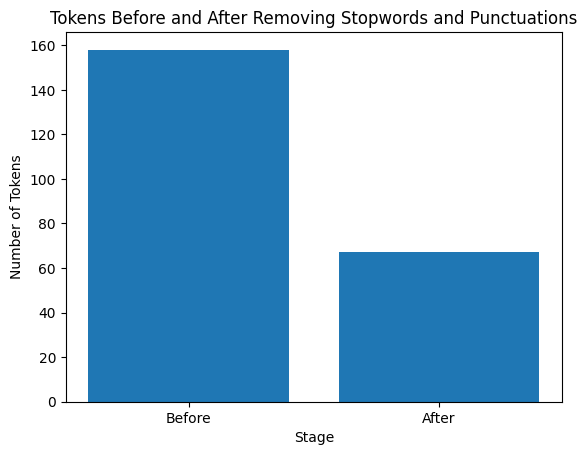

In [67]:
# Define data
labels = ["Before", "After"]
values = [158, 67]

# Create bar chart
plt.bar(labels, values)
plt.xlabel("Stage")
plt.ylabel("Number of Tokens")
plt.title("Tokens Before and After Removing Stopwords and Punctuations")
plt.show()

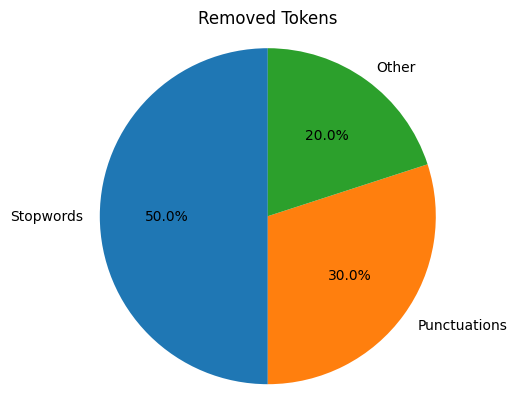

In [68]:
# Define data
labels = ["Stopwords", "Punctuations", "Other"]
sizes = [50, 30, 20]

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90)
ax.axis("equal")  # Equal aspect ratio ensures a circular pie chart
plt.title("Removed Tokens")
plt.show()

**Normalizing word frequency**

In [69]:
max_freq = max(word_freq.values())

for word in word_freq.keys():
  word_freq[word] = word_freq[word]/max_freq

In [70]:
print(word_freq)

{'Samsung': 1.0, 'recently': 0.3333333333333333, 'cancelled': 0.16666666666666666, 'person': 0.16666666666666666, 'MWC': 0.3333333333333333, '2021': 0.16666666666666666, 'event': 0.5, 'instead': 0.16666666666666666, 'committing': 0.16666666666666666, 'online': 0.16666666666666666, 'format': 0.16666666666666666, 'South': 0.16666666666666666, 'Korean': 0.16666666666666666, 'tech': 0.16666666666666666, 'giant': 0.16666666666666666, 'official': 0.16666666666666666, 'setting': 0.16666666666666666, 'time': 0.16666666666666666, 'date': 0.16666666666666666, 'Galaxy': 0.3333333333333333, 'Virtual': 0.16666666666666666, 'Event': 0.16666666666666666, '\n': 0.3333333333333333, 'held': 0.16666666666666666, 'June': 0.16666666666666666, '28': 0.16666666666666666, '17:15': 0.16666666666666666, 'UTC': 0.16666666666666666, '22:45': 0.16666666666666666, 'IST': 0.16666666666666666, 'live': 0.16666666666666666, 'streamed': 0.16666666666666666, 'YouTube': 0.16666666666666666, 'release': 0.16666666666666666,

In [72]:
sent_scores = {}

for sent in sent_tokens:
  for word in sent:
    if word.text in word_freq.keys():
      if sent not in sent_scores.keys():
        sent_scores[sent] = word_freq[word.text]
      else:
        sent_scores[sent] += word_freq[word.text]

In [73]:
print(sent_scores)

{Samsung recently cancelled its in-person MWC 2021 event, instead, committing to an online-only format.: 3.3333333333333326, The South Korean tech giant recently made it official, setting a time and date for the Samsung Galaxy MWC Virtual Event.
: 4.0, The event will be held on June 28 at 17:15 UTC (22:45 IST) and will be live-streamed on YouTube.: 2.1666666666666665, In its release, Samsung says that it will introduce its "ever-expanding Galaxy device ecosystem".: 2.5000000000000004, Samsung also plans to present the latest technologies and innovation efforts in relation to the growing importance of smart device security.
: 3.5, Samsung will also showcase its vision for the future of smartwatches to provide new experiences for users and new opportunities for developers.: 3.1666666666666665, Samsung also shared an image for the event with silhouettes of a smartwatch, a smartphone, a tablet and a laptop.: 2.666666666666666}


**Summary Begins**

In [76]:
select_len = int(len(sent_tokens) * 0.3)
summary = nlargest(select_len, sent_scores, key=sent_scores.get)

In [78]:
final_summary = [word.text for word in summary]
summary = ' '.join(final_summary)

In [81]:
print("Original text\n", text)
print("Summarized text\n", summary)

print("Length of original text ", len(text.split()))
print("Length of summarized text ", len(summary.split()))

Original text
 Samsung recently cancelled its in-person MWC 2021 event, instead, committing to an online-only format. The South Korean tech giant recently made it official, setting a time and date for the Samsung Galaxy MWC Virtual Event.
The event will be held on June 28 at 17:15 UTC (22:45 IST) and will be live-streamed on YouTube. In its release, Samsung says that it will introduce its "ever-expanding Galaxy device ecosystem". Samsung also plans to present the latest technologies and innovation efforts in relation to the growing importance of smart device security.
Samsung will also showcase its vision for the future of smartwatches to provide new experiences for users and new opportunities for developers. Samsung also shared an image for the event with silhouettes of a smartwatch, a smartphone, a tablet and a laptop.
Summarized text
 The South Korean tech giant recently made it official, setting a time and date for the Samsung Galaxy MWC Virtual Event.
 Samsung also plans to presen